### Predicting heart disease using machine learning

In this project we'll look into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:

(1). Problem definition

(2). Data

(3). Feature Engineering

(4). Modelling



### 1. Problem Definition

Given clinical parameters about a patient, can we predict whether or not they have heart disease?

The challenge at hand revolves around the creation of a sophisticated predictive model aimed at determining the likelihood of an individual having heart disease. As one of the leading causes of global mortality, detecting heart disease in its early stages is pivotal for enhancing patient outcomes and halting its progression. The conventional diagnostic methods often come with substantial costs and time requirements. Thus, there exists a pressing need for a cutting-edge predictive model that can evaluate the risk of heart disease utilizing easily accessible patient information.

The objective of this challenge is to design and build a predictive model capable of accurately determining the probability of an individual having heart disease. The focus is on leveraging machine learning techniques to create a model that can analyze relevant features and provide reliable predictions. The model should demonstrate high accuracy and generalizability, ensuring its effectiveness on new, unseen data.

### 2. Data

The data is imported from Zindi for DSN Ai Bootcamp Qualification hackathon.

### 3.Features
This is where we'll get different information about each of the features in the data. 

Create data dictionary

age - age in years

sex - (1 = male; 0 = female)

cp - chest pain type (4 values)

0: Typical angina: chest pain related decrease blood supply to the heart
        
1: Atypical angina: chest pain not related to heart
        
2: Non-anginal pain: typically esophageal spasms (non heart related)
        
3: Asymptomatic: chest pain not showing signs of disease
        
trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern

chol - serum cholestoral in mg/dl

serum = LDL + HDL + .2 * triglycerides

above 200 is cause for concern

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

'>126' mg/dL signals diabetes

restecg - resting electrocardiographic results

0: Nothing to note
    
1: ST-T Wave abnormality
    
can range from mild symptoms to severe problems

signals non-normal heart beat

2: Possible or definite left ventricular hypertrophy
    
Enlarged heart's main pumping chamber

thalach - maximum heart rate achieved

exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

slope - the slope of the peak exercise ST segment

0: Upsloping: better heart rate with excercise (uncommon)
        
1: Flatsloping: minimal change (typical healthy heart)
        
2: Downslopins: signs of unhealthy heart
        
ca - number of major vessels (0-3) colored by flourosopy

colored vessel means the doctor can see the blood passing through

the more blood movement the better (no clots)

thal - thalium stress result

1,3: normal
    
6: fixed defect: used to be defect but ok now
        
7: reversable defect: no proper blood movement when excercising
        
target - have disease or not (1=yes, 0=no) (= the predicted attribute)

### Preparing the tools
We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [6]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay #plot_roc_curve

### Load data

In [8]:
df = pd.read_csv("Train Dataset .csv")
df.shape # (rows, columns)

(7303, 15)

In [9]:
test= pd.read_csv("Test Dataset.csv")

### EDA (exploratory data analysis)



In [11]:
df.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [12]:
test.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,16501,70,1,0,163,495,0,2,170,1,2.0,1,0,1
1,10444,61,1,0,131,238,0,2,74,1,4.9,2,2,2
2,14288,53,1,0,95,558,1,1,73,1,0.7,1,1,0
3,10409,37,0,1,178,287,0,1,192,1,5.7,1,0,0
4,17330,35,0,3,104,281,0,0,122,0,1.3,1,4,3


In [13]:
df.columns = df.columns.str.lower()

# To check the new column names
print(df.columns)

Index(['id', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [14]:
df["target"].value_counts()

target
1    5941
0    1362
Name: count, dtype: int64

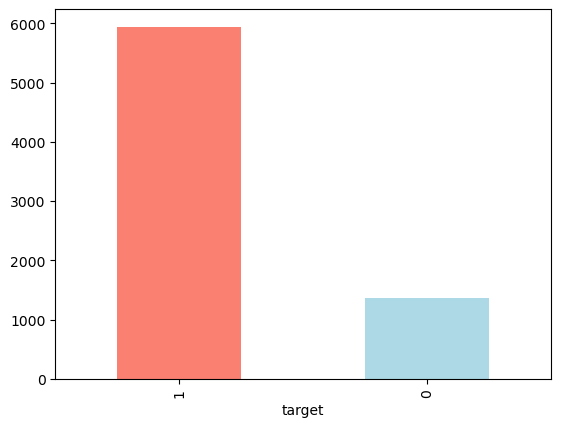

In [15]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

<Axes: ylabel='count'>

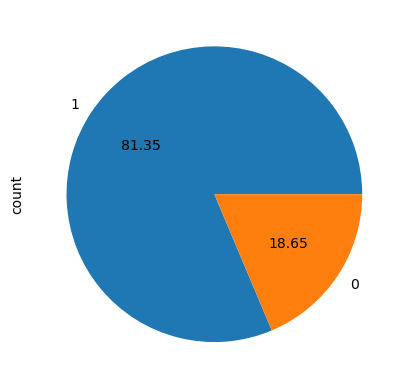

In [16]:
df["target"].value_counts().plot.pie(autopct='%.2f')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        7303 non-null   int64  
 1   age       7303 non-null   int64  
 2   sex       7303 non-null   int64  
 3   cp        7303 non-null   int64  
 4   trestbps  7303 non-null   int64  
 5   chol      7303 non-null   int64  
 6   fbs       7303 non-null   int64  
 7   restecg   7303 non-null   int64  
 8   thalach   7303 non-null   int64  
 9   exang     7303 non-null   int64  
 10  oldpeak   7303 non-null   float64
 11  slope     7303 non-null   int64  
 12  ca        7303 non-null   int64  
 13  thal      7303 non-null   int64  
 14  target    7303 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 855.9 KB


In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2697 entries, 0 to 2696
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        2697 non-null   int64  
 1   age       2697 non-null   int64  
 2   sex       2697 non-null   int64  
 3   cp        2697 non-null   int64  
 4   trestbps  2697 non-null   int64  
 5   chol      2697 non-null   int64  
 6   fbs       2697 non-null   int64  
 7   restecg   2697 non-null   int64  
 8   thalach   2697 non-null   int64  
 9   exang     2697 non-null   int64  
 10  oldpeak   2697 non-null   float64
 11  slope     2697 non-null   int64  
 12  ca        2697 non-null   int64  
 13  thal      2697 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 295.1 KB


In [19]:
df.isnull().sum()

id          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [20]:
test.isnull().sum()

id          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [21]:
df.describe()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000
mean,15021.535396,53.172669,0.499658,1.502533,147.447487,342.805970,0.493085,1.013008,136.506093,0.503218,3.129851,0.991510,2.019033,1.502259,0.813501
std,2886.026080,14.185970,0.500034,1.115594,31.099538,127.291998,0.499986,0.815806,38.141966,0.500024,1.791160,0.817291,1.410546,1.113137,0.389535
min,10001.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12521.500000,41.000000,0.000000,1.000000,120.000000,231.000000,0.000000,0.000000,104.000000,0.000000,1.600000,0.000000,1.000000,1.000000,1.000000
50%,15054.000000,53.000000,0.000000,1.000000,148.000000,341.000000,0.000000,1.000000,137.000000,1.000000,3.100000,1.000000,2.000000,1.000000,1.000000
75%,17513.500000,65.000000,1.000000,3.000000,174.000000,450.000000,1.000000,2.000000,170.000000,1.000000,4.700000,2.000000,3.000000,2.000000,1.000000
max,19998.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [22]:
test.describe()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000
mean,14939.832036,53.064516,0.488691,1.504264,146.384872,344.027809,0.497219,1.021135,135.993326,0.484613,3.142714,1.011494,2.032258,1.473489
std,2888.940621,14.350978,0.499965,1.112747,30.640580,127.265038,0.500085,0.811590,38.419913,0.499856,1.810003,0.814976,1.397353,1.120744
min,10000.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12455.000000,41.000000,0.000000,1.000000,121.000000,233.000000,0.000000,0.000000,103.000000,0.000000,1.600000,0.000000,1.000000,0.000000
50%,14854.000000,53.000000,0.000000,1.000000,147.000000,344.000000,0.000000,1.000000,136.000000,0.000000,3.200000,1.000000,2.000000,1.000000
75%,17465.000000,66.000000,1.000000,3.000000,172.000000,455.000000,1.000000,2.000000,170.000000,1.000000,4.700000,2.000000,3.000000,2.000000
max,19999.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [23]:
test

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,16501,70,1,0,163,495,0,2,170,1,2.0,1,0,1
1,10444,61,1,0,131,238,0,2,74,1,4.9,2,2,2
2,14288,53,1,0,95,558,1,1,73,1,0.7,1,1,0
3,10409,37,0,1,178,287,0,1,192,1,5.7,1,0,0
4,17330,35,0,3,104,281,0,0,122,0,1.3,1,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2692,14964,34,0,3,136,291,0,1,163,0,2.6,2,2,3
2693,16774,72,0,1,104,166,1,2,95,1,0.3,0,2,2
2694,18884,31,1,0,153,457,1,1,170,1,3.8,0,3,1
2695,10000,71,0,0,111,242,1,0,147,1,5.3,0,1,2


### Heart Disease Frequency according to Sex

In [25]:
df.sex.value_counts()

sex
0    3654
1    3649
Name: count, dtype: int64

In [26]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,725,637
1,2929,3012


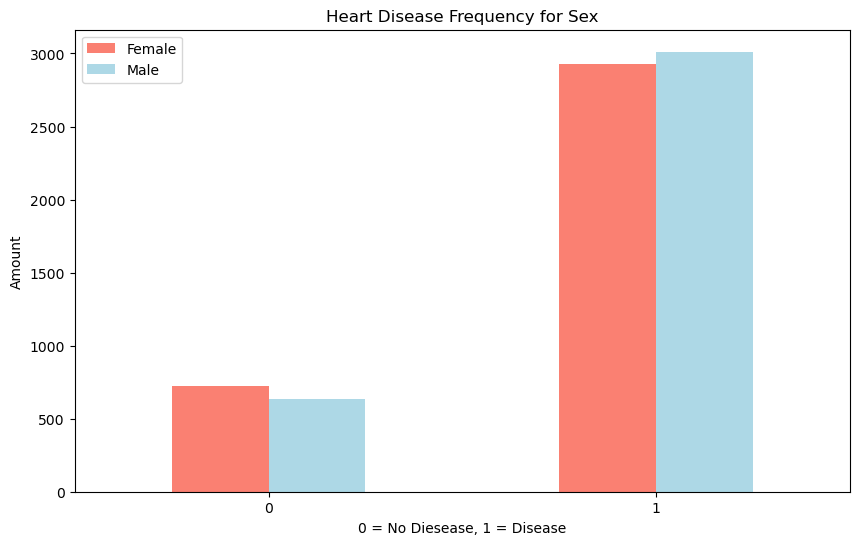

In [27]:
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

### 

### Age vs. Max Heart Rate for Heart Disease

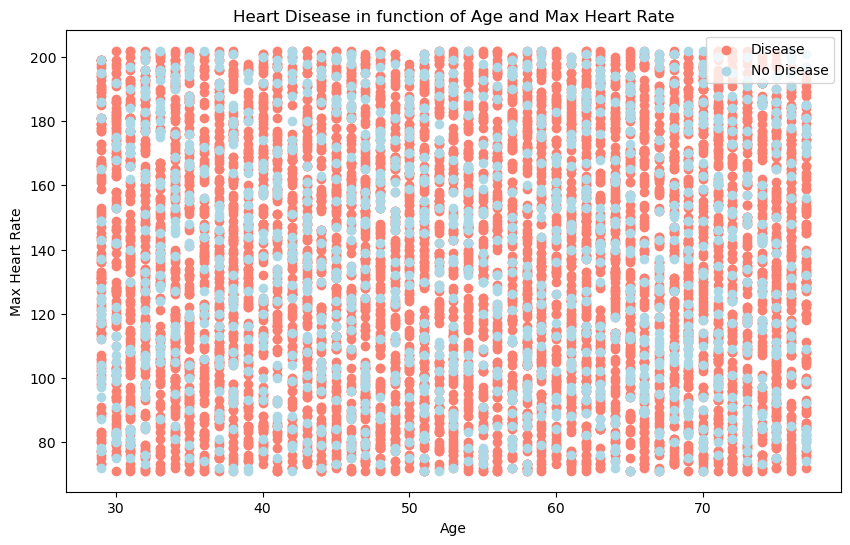

In [30]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

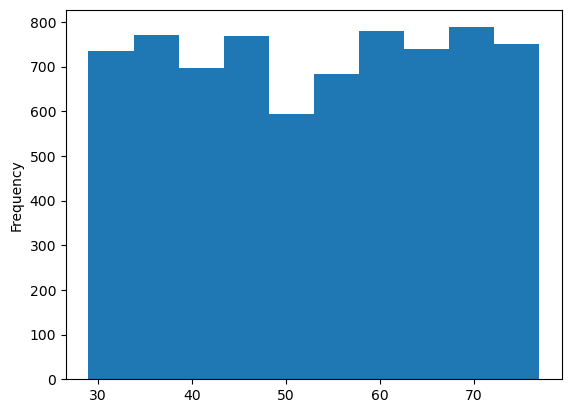

In [31]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

### Heart Disease Frequency per Chest Pain Type

3.cp - chest pain type

0: Typical angina: chest pain related decrease blood supply to the heart

1: Atypical angina: chest pain not related to heart

2: Non-anginal pain: typically esophageal spasms (non heart related)

3: Asymptomatic: chest pain not showing signs of disease

In [33]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,0,1802
1,480,1378
2,451,1363
3,431,1398


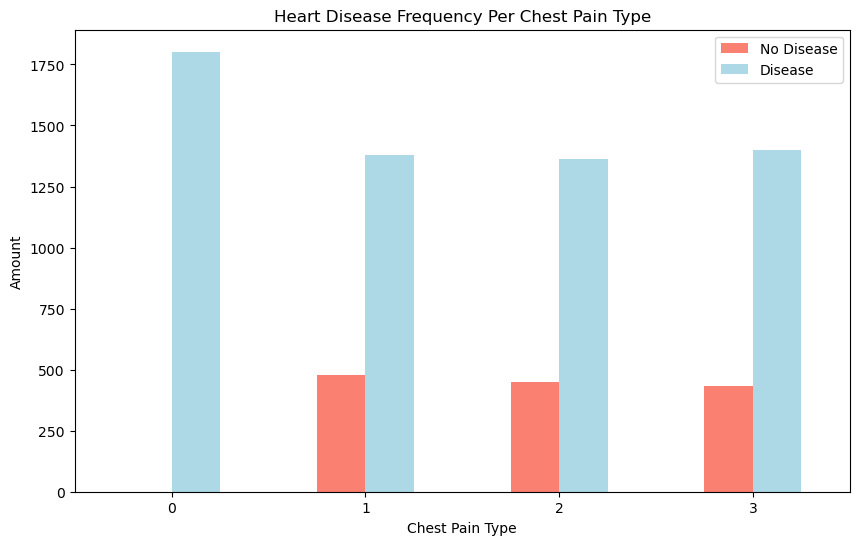

In [34]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [35]:
df.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [36]:
# Make a correlation matrix
df.corr()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
id,1.000000,-0.007837,0.002818,-0.018952,-0.016580,0.015200,-0.023790,0.001488,-0.012959,0.001735,0.004434,0.000617,0.033008,-0.000420,0.006148
age,-0.007837,1.000000,0.002335,-0.001771,-0.022767,0.004541,0.012960,-0.002644,0.000204,0.001495,0.007193,-0.004480,0.013257,0.002313,-0.002846
sex,0.002818,0.002335,1.000000,-0.030134,0.002793,-0.007434,-0.017675,-0.003850,-0.006331,0.027802,-0.004897,0.000663,0.010203,0.003261,0.030608
cp,-0.018952,-0.001771,-0.030134,1.000000,0.011924,0.024823,-0.016848,0.001544,0.019503,0.009621,0.000942,-0.009439,0.013676,-0.009296,-0.198082
trestbps,-0.016580,-0.022767,0.002793,0.011924,1.000000,-0.003238,0.003757,0.010334,0.001575,0.021449,0.011277,0.001750,-0.009947,0.005632,0.009320
chol,0.015200,0.004541,-0.007434,0.024823,-0.003238,1.000000,0.006588,0.003218,-0.014182,-0.006674,-0.003930,-0.013061,0.007788,0.011114,-0.012291
fbs,-0.023790,0.012960,-0.017675,-0.016848,0.003757,0.006588,1.000000,-0.002298,0.005419,0.010908,0.004803,0.000191,0.001255,-0.006554,0.003925
restecg,0.001488,-0.002644,-0.003850,0.001544,0.010334,0.003218,-0.002298,1.000000,-0.004714,-0.000270,0.017644,0.015365,0.003593,-0.007497,0.005911
thalach,-0.012959,0.000204,-0.006331,0.019503,0.001575,-0.014182,0.005419,-0.004714,1.000000,0.019037,0.012347,-0.010617,0.004899,0.007943,-0.004634
exang,0.001735,0.001495,0.027802,0.009621,0.021449,-0.006674,0.010908,-0.000270,0.019037,1.000000,0.018074,0.005094,-0.012028,0.010875,0.481897


(15.5, -0.5)

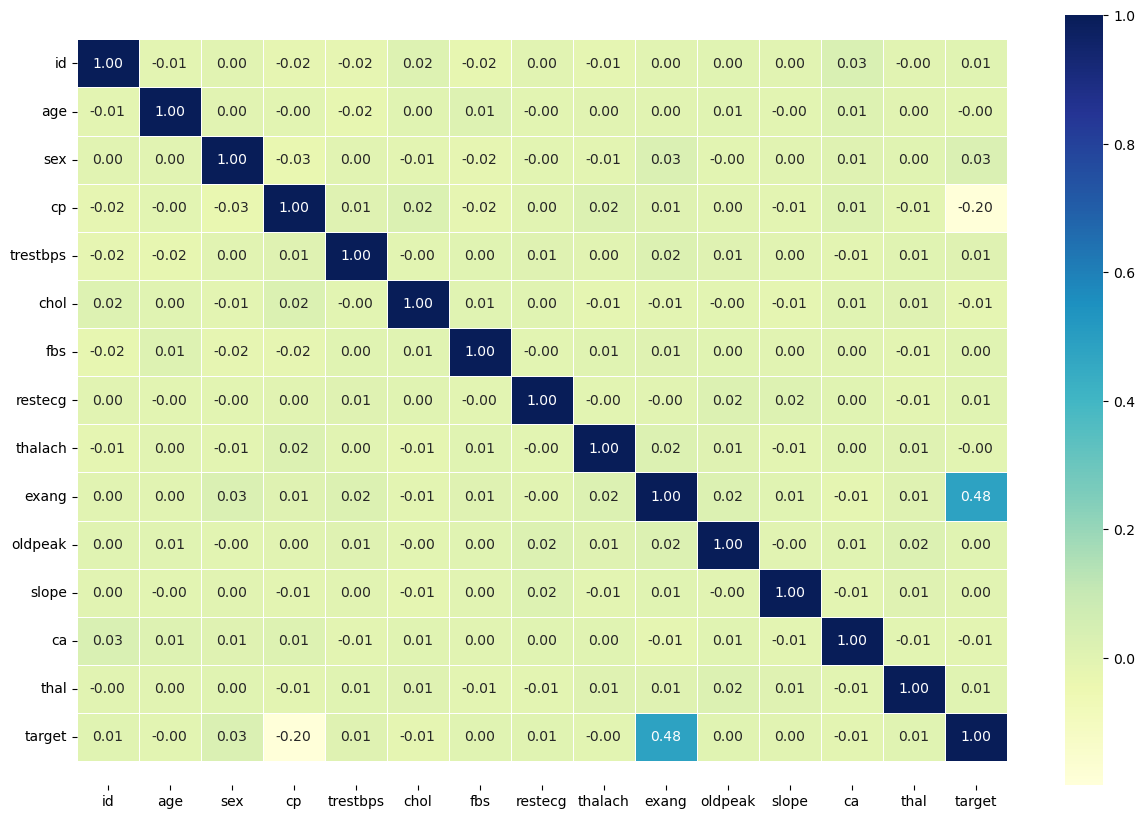

In [37]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Feature Engineering

In [39]:
# One-Hot Encode the 'cp' column in train dataset
df = pd.get_dummies(df, columns=['cp'], prefix='cp')

In [40]:
# One-Hot Encode the 'cp' column test dataset
test = pd.get_dummies(test, columns=['cp'], prefix='cp')

In [41]:
df

,id,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3
0,16167,33,0,158,205,1,0,154,0,1.5,1,4,1,1,False,True,False,False
1,11275,53,1,198,154,0,1,104,0,0.8,2,1,0,0,False,False,True,False
2,13251,37,1,101,202,1,0,155,0,2.1,1,3,1,1,False,False,True,False
3,19921,75,0,113,306,1,2,88,1,4.9,0,2,2,1,True,False,False,False
4,11293,35,1,139,419,1,1,166,1,0.9,2,4,0,1,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7298,19401,30,1,107,177,1,2,119,0,2.7,1,0,0,0,False,False,True,False
7299,10446,42,1,96,551,1,2,76,0,1.9,2,3,2,1,False,False,True,False
7300,13219,51,1,151,165,1,0,190,1,0.9,0,0,2,1,True,False,False,False
7301,15349,29,0,195,287,1,2,161,1,3.4,1,1,0,1,True,False,False,False


In [42]:
test

,id,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_0,cp_1,cp_2,cp_3
0,16501,70,1,163,495,0,2,170,1,2.0,1,0,1,True,False,False,False
1,10444,61,1,131,238,0,2,74,1,4.9,2,2,2,True,False,False,False
2,14288,53,1,95,558,1,1,73,1,0.7,1,1,0,True,False,False,False
3,10409,37,0,178,287,0,1,192,1,5.7,1,0,0,False,True,False,False
4,17330,35,0,104,281,0,0,122,0,1.3,1,4,3,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2692,14964,34,0,136,291,0,1,163,0,2.6,2,2,3,False,False,False,True
2693,16774,72,0,104,166,1,2,95,1,0.3,0,2,2,False,True,False,False
2694,18884,31,1,153,457,1,1,170,1,3.8,0,3,1,True,False,False,False
2695,10000,71,0,111,242,1,0,147,1,5.3,0,1,2,True,False,False,False


In [43]:
df.drop("id", axis=1)

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3
0,33,0,158,205,1,0,154,0,1.5,1,4,1,1,False,True,False,False
1,53,1,198,154,0,1,104,0,0.8,2,1,0,0,False,False,True,False
2,37,1,101,202,1,0,155,0,2.1,1,3,1,1,False,False,True,False
3,75,0,113,306,1,2,88,1,4.9,0,2,2,1,True,False,False,False
4,35,1,139,419,1,1,166,1,0.9,2,4,0,1,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7298,30,1,107,177,1,2,119,0,2.7,1,0,0,0,False,False,True,False
7299,42,1,96,551,1,2,76,0,1.9,2,3,2,1,False,False,True,False
7300,51,1,151,165,1,0,190,1,0.9,0,0,2,1,True,False,False,False
7301,29,0,195,287,1,2,161,1,3.4,1,1,0,1,True,False,False,False


In [44]:
test.drop("id", axis=1)

## 4.Modelling

In [48]:
df.head()

,id,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3
0,16167,33,0,158,205,1,0,154,0,1.5,1,4,1,1,False,True,False,False
1,11275,53,1,198,154,0,1,104,0,0.8,2,1,0,0,False,False,True,False
2,13251,37,1,101,202,1,0,155,0,2.1,1,3,1,1,False,False,True,False
3,19921,75,0,113,306,1,2,88,1,4.9,0,2,2,1,True,False,False,False
4,11293,35,1,139,419,1,1,166,1,0.9,2,4,0,1,False,False,True,False


In [49]:
# Split data into X and y
X = df.drop("target", axis=1)

y = df["target"]

In [50]:
X

,id,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_0,cp_1,cp_2,cp_3
0,16167,33,0,158,205,1,0,154,0,1.5,1,4,1,False,True,False,False
1,11275,53,1,198,154,0,1,104,0,0.8,2,1,0,False,False,True,False
2,13251,37,1,101,202,1,0,155,0,2.1,1,3,1,False,False,True,False
3,19921,75,0,113,306,1,2,88,1,4.9,0,2,2,True,False,False,False
4,11293,35,1,139,419,1,1,166,1,0.9,2,4,0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7298,19401,30,1,107,177,1,2,119,0,2.7,1,0,0,False,False,True,False
7299,10446,42,1,96,551,1,2,76,0,1.9,2,3,2,False,False,True,False
7300,13219,51,1,151,165,1,0,190,1,0.9,0,0,2,True,False,False,False
7301,15349,29,0,195,287,1,2,161,1,3.4,1,1,0,True,False,False,False


In [51]:
y

0       1
1       0
2       1
3       1
4       1
       ..
7298    0
7299    1
7300    1
7301    1
7302    1
Name: target, Length: 7303, dtype: int64

In [52]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

### Hyperparameter tuning (by hand)

In [53]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [ ]:
train_scores

In [ ]:
test_scores

Maximum KNN score on the test data: 82.20%


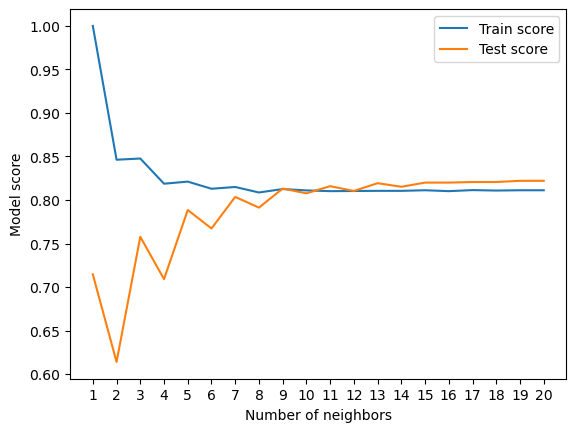

In [54]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### Hyperparameter tuning with RandomizedSearchCV

We're going to tune:

LogisticRegression()

RandomForestClassifier()

... using RandomizedSearchCV

In [55]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [56]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [57]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.0001}

In [58]:
rs_log_reg.score(X_test, y_test)

0.8220396988364134

In [59]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [60]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 18,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [61]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_train, y_train)

0.8113659705580281

### Hyperparamter Tuning with GridSearchCV

Improving LogisticRegression model again using GridSearchCV...

In [62]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [63]:
# Check the best hyperparmaters
gs_log_reg.best_params_

{'C': 788.0462815669904, 'solver': 'liblinear'}

In [64]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_train, y_train)


0.8132488873673399

In [65]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [ ]:
y_preds

## Modelling 2

Modelling with balanced dataset to improve the model's output, repeating everything done above

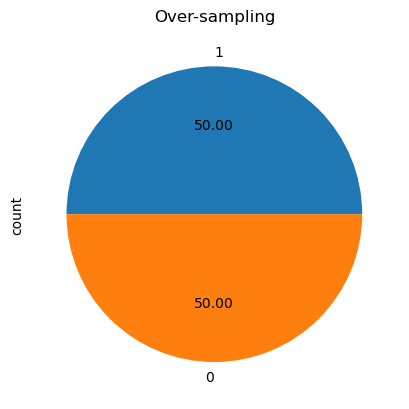

In [66]:
from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res, y_res = ros.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [67]:
y_res.value_counts()

target
1    5941
0    5941
Name: count, dtype: int64

In [68]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X_res,
                                                    y_res,
                                                    test_size=0.2)

### Hyperparameter tuning with RandomizedSearchCV

We're going to tune:

LogisticRegression()

RandomForestClassifier()

... using RandomizedSearchCV

In [77]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV...

In [79]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_res, y_res)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [80]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.0006951927961775605}

In [81]:
rs_log_reg.score(X_test, y_test)

0.8788388725283971

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()...

In [83]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_res,y_res)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [84]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [85]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_res, y_res)

0.9873758626493856

### Hyperparamter Tuning with GridSearchCV

Improving LogisticRegression model again using GridSearchCV...

In [87]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_res, y_res);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [88]:
# Check the best hyperparmaters
gs_log_reg.best_params_

{'C': 0.0006723357536499335, 'solver': 'liblinear'}

In [89]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_res, y_res)

0.8835212927116647

In [90]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [91]:
y_preds

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [92]:
y_test

5532    1
5654    1
7202    1
2473    1
2184    1
       ..
3991    1
3079    1
5302    1
3898    0
6159    1
Name: target, Length: 2377, dtype: int64

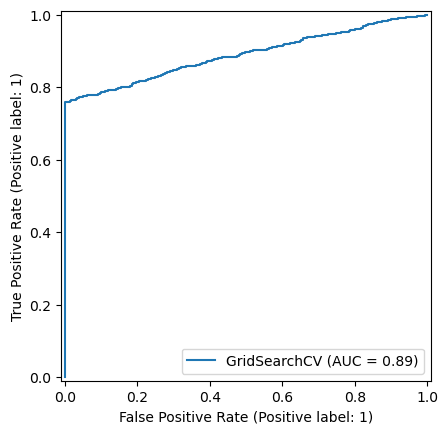

In [93]:
# Generate ROC curve and plot it
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)

# Show the plot
plt.show()

In [94]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[1181    0]
 [ 288  908]]


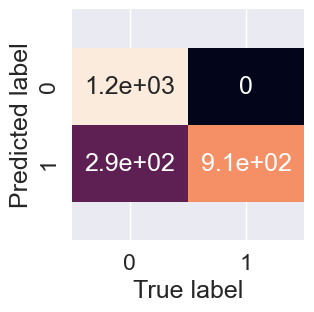

In [95]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score.

In [97]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1181
           1       1.00      0.76      0.86      1196

    accuracy                           0.88      2377
   macro avg       0.90      0.88      0.88      2377
weighted avg       0.90      0.88      0.88      2377



### Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using cross_val_score().

In [99]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.0006723357536499335, 'solver': 'liblinear'}

In [100]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [101]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.80082136, 0.81177276, 0.80766598, 0.81369863, 0.80547945])

In [102]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8078876356033117

### Esembling

In [104]:
from sklearn.ensemble import VotingClassifier

# Create the Voting Classifier (using soft voting)
voting_clf = VotingClassifier(estimators=[
    ('knn', knn),
    ('logreg', gs_log_reg),
    ('rf', rs_rf)
], voting='soft')  # Use 'hard' for hard voting

# Train the ensemble
voting_clf.fit(X_res, y_res)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=20)),
                             ('logreg',
                              GridSearchCV(cv=5, estimator=LogisticRegression(),
                                           param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01...
                              RandomizedSearchCV(cv=5,
                                                 estimator=RandomForestClassifier(),
                                                 n_iter=20,
                                                 param_distributions={'max_depth': [None,
                                                                                    3,
                                                                                    5,
                                                                                    10],
                                                                      'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                                                      'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                                                      'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                                                 verbose=True))],
                 voting='soft')

In [105]:
from sklearn.metrics import accuracy_score

# Make predictions and evaluate
y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Voting Classifier Accuracy: {accuracy}')

Voting Classifier Accuracy: 0.987379049221708


### Feature Importance

Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model...

In [107]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [108]:
# Check coef_
clf.coef_

array([[ 7.12697259e-06, -1.03992842e-03,  9.28889712e-02,
         2.28988415e-04,  1.17873064e-04, -7.85631496e-02,
         5.02187444e-02, -4.83151997e-04,  5.77794692e+00,
        -1.47690917e-02, -6.12661779e-03, -5.06974766e-04,
        -2.71765910e-02,  3.73397219e+00, -1.33700355e+00,
        -1.28051255e+00, -1.26365231e+00]])

In [109]:
df.head()

,id,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3
0,16167,33,0,158,205,1,0,154,0,1.5,1,4,1,1,False,True,False,False
1,11275,53,1,198,154,0,1,104,0,0.8,2,1,0,0,False,False,True,False
2,13251,37,1,101,202,1,0,155,0,2.1,1,3,1,1,False,False,True,False
3,19921,75,0,113,306,1,2,88,1,4.9,0,2,2,1,True,False,False,False
4,11293,35,1,139,419,1,1,166,1,0.9,2,4,0,1,False,False,True,False


In [110]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'id': 7.126972585972628e-06,
 'age': -0.0010399284204157212,
 'sex': 0.09288897119661751,
 'trestbps': 0.00022898841505652098,
 'chol': 0.0001178730643938288,
 'fbs': -0.07856314958261458,
 'restecg': 0.050218744386579195,
 'thalach': -0.00048315199739420745,
 'exang': 5.777946916661308,
 'oldpeak': -0.014769091731478778,
 'slope': -0.006126617787353931,
 'ca': -0.0005069747664053178,
 'thal': -0.027176590976218974,
 'target': 3.7339721903953618,
 'cp_0': -1.3370035454677975,
 'cp_1': -1.2805125497229846,
 'cp_2': -1.2636523062423355}

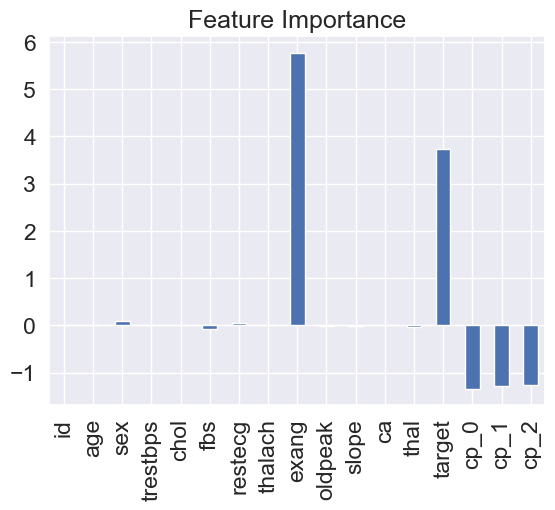

In [111]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [112]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,725,2929
1,637,3012


In [113]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,464,2006
1,450,1975
2,448,1960


slope - the slope of the peak exercise ST segment

0: Upsloping: better heart rate with excercise (uncommon)
        
1: Flatsloping: minimal change (typical healthy heart)
        
2: Downslopins: signs of unhealthy heart

## Generating Predictions

In [115]:
sample_sub = pd.read_csv("Sample Submission.csv")

In [116]:
sample_sub

,Id
0,16501
1,10444
2,14288
3,10409
4,17330
...,...
2692,14964
2693,16774
2694,18884
2695,10000


In [117]:
## Making Predictions on Test Data
# Finally, we use the trained model to make predictions on the test set and prepare the submission file.
predictions =  voting_clf.predict(test)
baseline_sub = sample_sub.copy()
baseline_sub['target'] = predictions
baseline_sub.to_csv('submission_69.csv', index=False)

# Display the first few rows of the submission file
baseline_sub.head()                  

,Id,target
0,16501,1
1,10444,1
2,14288,1
3,10409,1
4,17330,1
